# **Model Interpretability of Heart Attack Analysis & Prediction Dataset**

**What is Model Interpretability ?** <br/>
Model interpretability refers to the ability to understand how a machine learning model arrives at its predictions or decisions. In other words, it is the ability to explain the logic or reasoning behind a model's output in a way that humans can understand.

Interpretability is important because it allows us to understand how the model is making decisions, which in turn can help us identify biases, errors, or limitations in the model. It also enables us to gain trust in the model's predictions and to identify areas where the model can be improved.

There are many techniques and approaches to achieving interpretability in machine learning models, ranging from simple methods such as feature importance analysis, to more complex methods such as model-specific visualization techniques and rule extraction algorithms.

**Data Set**<br/>
The data set consists of :

14 characteristics of the situation that smoke detection at i.e. - The independent variables
The Target Variable - The dependent variable
The condition of heart attack is represented by 0 and 1..
There are a total of --- observations.

**Feature details** <br/>


age - Age of the person <br/>
sex - Gender of the person <br/>
cp - Chest Pain type  <br/>
trtbps - resting blood pressure (in mm Hg) <br/>
chol - cholestoral in mg/dl fetched via BMI sensor fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br/>
restecg - resting electrocardiographic results <br/>
thalachh - maximum heart rate achieved <br/>
exng - exercise induced angina (1 = yes; 0 = no) <br/>
oldpeak - Previous peak <br/>
slp - Slope <br/>
caa - number of major vessels (0-3) <br/>
thall - Thal rate <br/>
output - Target variable <br/>

In [6]:
!pip install shap
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn import tree
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 8.7 MB/s eta 0:00:00


In [7]:
url = "https://raw.githubusercontent.com/devika-boddu/DataScience-Engineering-Methods/main/heart.csv" 
df =  pd.read_csv("https://raw.githubusercontent.com/devika-boddu/DataScience-Engineering-Methods/main/heart.csv")

In [8]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#checking null values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
len(df)

303

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [12]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

**Observation** : seems like a balanced dataset

Using countplot() method is used to Show the counts of observations in each categorical bin using bars. <br/>
Parameters : This method is accepting the following parameters that are described below: x, y: This parameter take names of variables in data or vector data, optional, Inputs for plotting long-form data.

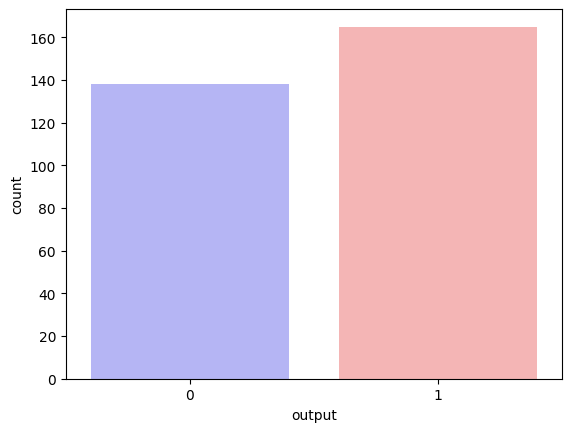

In [13]:
sns.countplot(x="output",data=df,palette="bwr")
plt.show()

In [14]:
y=df.output

In [15]:
X=df.drop("output",axis=1)

In [16]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7)

**Fitting a linear model and interpret the regression coefficients**

Since the dataset is of classification type, We're using Logistic regression. <br/>
LogisticRegression is a machine learning model used for binary classification problems, which means it's used to predict one of two possible outcomes (e.g., yes or no, true or false). The solver parameter specifies the algorithm used to optimize the model parameters, and the max_iter parameter specifies the maximum number of iterations for the solver to converge to a solution.<br/>

Specifically, the solver parameter is set to "lbfgs", which stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. This is an optimization algorithm that uses an approximation of the Hessian matrix to update the model parameters. It's generally a good choice for small to medium-sized datasets.<br/>

The max_iter parameter is set to 500, which means that the solver will iterate at most 500 times to find the optimal solution. If the algorithm has not converged after 500 iterations, it will stop and return the current best solution. Increasing max_iter can sometimes improve model performance, but it can also increase the training time and may lead to overfitting.<br/>

**Logistic Regression**

In [19]:
lr= LogisticRegression(solver='lbfgs',max_iter=500)

In [20]:
lr.fit(X_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(max_iter=500)

In [21]:
log_odds=lr.coef_[0]

**“For every one-unit increase in [X variable], the odds that the observation is in (y class) are [coefficient] times as large as the odds that the observation is not in (y class) when all other variables are held constant.”**



In [22]:
pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
cp,0.931956
restecg,0.266292
fbs,0.114591
thalachh,0.042109
age,0.000768
chol,-0.003084
trtbps,-0.026591
slp,-0.171650
oldpeak,-0.698782
caa,-0.705375


Because of the logit function, logistic regression coefficients represent the log odds that an observation is in the target class (“1”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular odds in order to make sense of them. Happily, this is done by simply exponentiating the log odds coefficients, which you can do with np.exp():

In [23]:
odds = np.exp(lr.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
cp,2.539471
restecg,1.305116
fbs,1.121415
thalachh,1.043008
age,1.000768
chol,0.996921
trtbps,0.973760
slp,0.842274
oldpeak,0.497191
caa,0.493923


So, as variable cp (again, chest pain) increases by one unit, the odds of getting the heart attack represented in the observation are in the target class (“1”) are over 2.51x as large as the odds that they won’t be in the target class. On the other hand, as caa increases by one unit, the odds of getting heart attack are in the target class are only 0.27. For odds less than 1 (our negative coefficients), we can take 1/odds to make even better sense of them. So as caa increases by 1, the odds of getting heart-attack is NOT in the target class are 1/0.27 or 2.51x (ominous!) as likely as the odds that it IS in the target class.

In [29]:
explainer= shap.LinearExplainer(lr,X_train)
shap_values= explainer.shap_values(X_train)

**SHAP analysis on the models from steps 1** <br/>
shap.summary_plot(shap_values, X_train) is a function call in the Python package SHAP (SHapley Additive exPlanations) that generates a summary plot for a given set of SHAP values and corresponding input features.<br/> 

SHAP values are a way to explain the output of a machine learning model by assigning a numerical value to each input feature, indicating how much that feature contributes to the model's prediction. The SHAP values are calculated based on the Shapley value concept from cooperative game theory.<br/> 

In the shap.summary_plot function call, shap_values is a matrix of SHAP values for the training set X_train. The X_train matrix contains the input features used to train the machine learning model. The summary plot shows the global feature importance of each feature, sorted by their mean absolute SHAP value.<br/> 

The summary plot consists of a horizontal bar chart with each bar representing a single input feature. The color of the bar indicates the direction of the feature's impact on the model's prediction, with red indicating positive impact and blue indicating negative impact. The length of the bar indicates the magnitude of the feature's impact on the model's prediction, with longer bars indicating larger impacts.<br/> 

The summary plot also includes a vertical line for each feature, showing the range of values for that feature in the training set. This can help identify any nonlinear relationships between the input features and the model's prediction.<br/> 

Overall, the shap.summary_plot function call is a useful tool for visualizing the global feature importance of a machine learning model and understanding how different input features contribute to the model's prediction.<br/>






No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


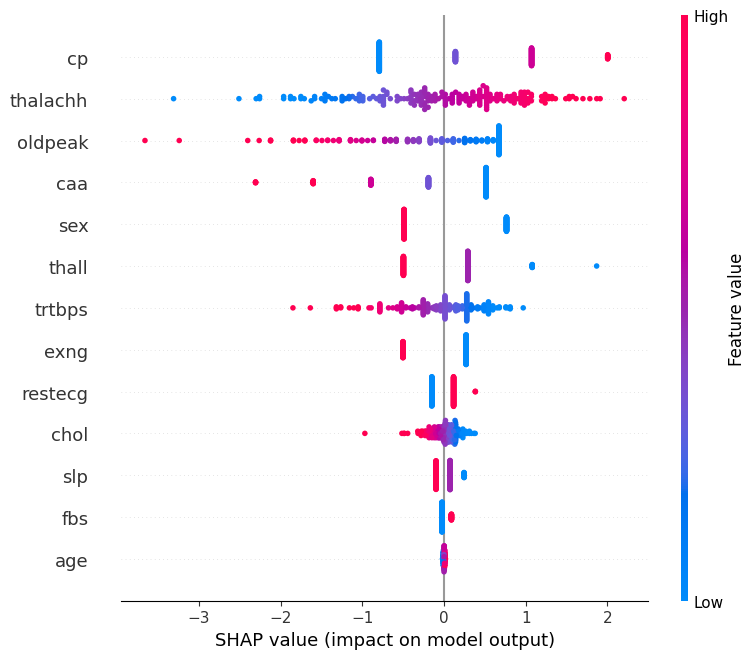

In [30]:
shap.summary_plot(shap_values,X_train)

**Intepreting the SHAP values:** <br/> 

high values of the cp variable have a high negative contribution on the prediction, while low values have a high positive contribution.

Here, higher the thalachh increases the higher is chance of heart attack output to be 1 and old peak is not affecting the target output

**Fitting a tree-based model and interpret the nodes**

In [31]:
dt = tree.DecisionTreeClassifier(criterion='entropy')

In [32]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5833333333333334, 0.95, 'x[2] <= 0.5\nentropy = 0.992\nsamples = 212\nvalue = [95, 117]'),
 Text(0.38333333333333336, 0.85, 'x[11] <= 0.5\nentropy = 0.841\nsamples = 100\nvalue = [73, 27]'),
 Text(0.26666666666666666, 0.75, 'x[12] <= 2.5\nentropy = 0.999\nsamples = 48\nvalue = [23, 25]'),
 Text(0.2, 0.65, 'x[10] <= 1.5\nentropy = 0.722\nsamples = 30\nvalue = [6, 24]'),
 Text(0.16666666666666666, 0.55, 'x[3] <= 145.0\nentropy = 0.918\nsamples = 18\nvalue = [6, 12]'),
 Text(0.13333333333333333, 0.45, 'x[4] <= 240.0\nentropy = 0.722\nsamples = 15\nvalue = [3, 12]'),
 Text(0.1, 0.35, 'x[3] <= 127.0\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.06666666666666667, 0.25, 'x[3] <= 116.0\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.03333333333333333, 0.15, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1, 0.15, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.13333333333333333, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.166666666666

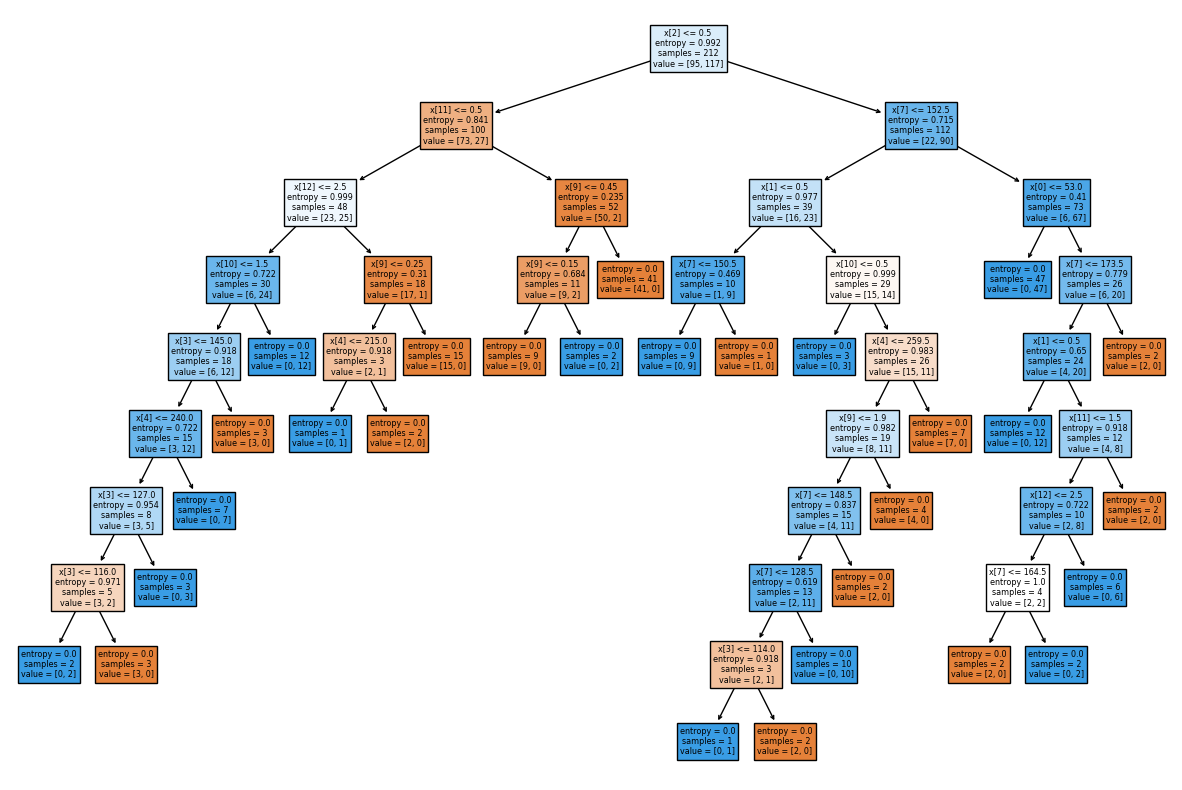

In [33]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [34]:
explainer= shap.TreeExplainer(dt)
shap_values= explainer.shap_values(X_train)

**SHAP analysis on the models from step 2:**

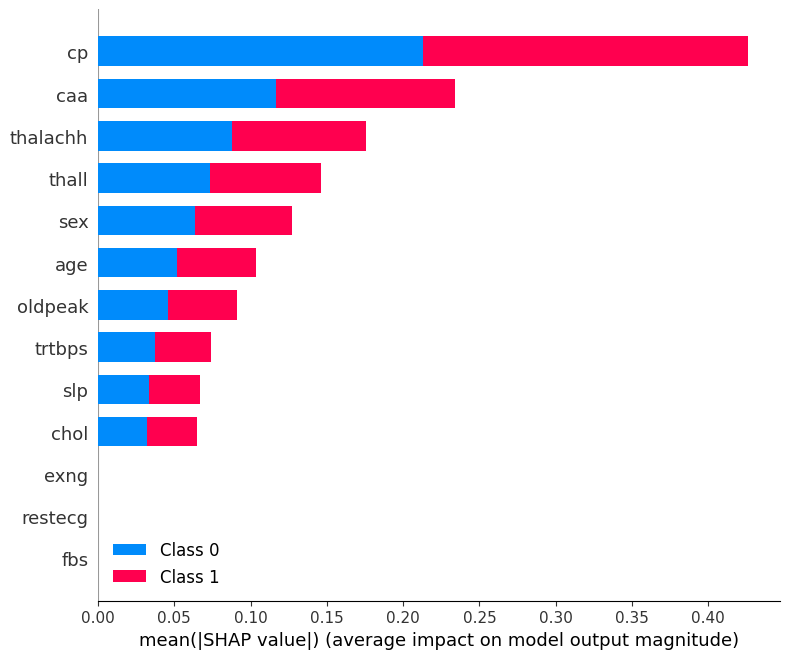

In [35]:
shap.summary_plot(shap_values,X_train)

**Intepreting the SHAP values:** <br/> 
This plot shows the cp, caa and thalachh are the important features in the given dataset

**Using auto ml to find the best model**

**Installing pycaret**

In [39]:
%pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from pycaret.classification import *
clf1= setup(data=df,target="output")

,Description,Value
0,Session id,5393
1,Target,output
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [41]:
clf2= setup(data=df,target="output",session_id=1,normalize=True,transformation=True,remove_multicollinearity=True,multicollinearity_threshold=0.95)

,Description,Value
0,Session id,1
1,Target,output
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [42]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8446,0.9052,0.8417,0.8719,0.8505,0.6879,0.6988,0.1350
ridge,Ridge Classifier,0.8307,0.0000,0.8947,0.8186,0.8515,0.6546,0.6657,0.1770
lr,Logistic Regression,0.8262,0.8941,0.8780,0.8228,0.8460,0.6465,0.6556,0.6230
lda,Linear Discriminant Analysis,0.8260,0.8940,0.8947,0.8122,0.8482,0.6442,0.6556,0.1170
knn,K Neighbors Classifier,0.8128,0.8837,0.8629,0.8192,0.8350,0.6195,0.6307,0.2340
et,Extra Trees Classifier,0.8071,0.8971,0.8341,0.8176,0.8226,0.6101,0.6151,0.4590
rf,Random Forest Classifier,0.7978,0.8763,0.8432,0.8002,0.8177,0.5900,0.5974,0.4950
xgboost,Extreme Gradient Boosting,0.7978,0.8707,0.8258,0.8128,0.8133,0.5913,0.6012,0.1740
lightgbm,Light Gradient Boosting Machine,0.7831,0.8604,0.8174,0.7884,0.8003,0.5614,0.5664,0.3920
qda,Quadratic Discriminant Analysis,0.7788,0.8856,0.8000,0.8006,0.7952,0.5542,0.5629,0.1120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

Bearing in mind we have a classification experiment, we look at accuracy as a primary benchmark metric to identify which model is the best. Naive Bayes and Ridge Clasifier are the most superior performing models.

In [43]:
nb_model= create_model('nb',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7727,0.7417,0.8333,0.7692,0.8000,0.5378,0.5401
1,0.8636,0.8500,0.9167,0.8462,0.8800,0.7227,0.7258
2,0.7619,0.8273,0.6364,0.8750,0.7368,0.5291,0.5516
3,0.7143,0.8818,0.6364,0.7778,0.7000,0.4324,0.4404
4,0.8571,0.9636,0.9091,0.8333,0.8696,0.7123,0.7156
5,0.9048,1.0000,0.8182,1.0000,0.9000,0.8108,0.8257
6,0.8571,0.9545,1.0000,0.7857,0.8800,0.7097,0.7416
7,0.9048,0.9444,0.8333,1.0000,0.9091,0.8108,0.8257
8,0.8571,0.9167,0.8333,0.9091,0.8696,0.7123,0.7156


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
hp_tune_df= tune_model(nb_model,optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7727,0.7417,0.8333,0.7692,0.8000,0.5378,0.5401
1,0.8636,0.8500,0.9167,0.8462,0.8800,0.7227,0.7258
2,0.7619,0.8273,0.6364,0.8750,0.7368,0.5291,0.5516
3,0.7143,0.8818,0.6364,0.7778,0.7000,0.4324,0.4404
4,0.8571,0.9636,0.9091,0.8333,0.8696,0.7123,0.7156
5,0.9048,1.0000,0.8182,1.0000,0.9000,0.8108,0.8257
6,0.8571,0.9545,1.0000,0.7857,0.8800,0.7097,0.7416
7,0.9048,0.9444,0.8333,1.0000,0.9091,0.8108,0.8257
8,0.8571,0.9167,0.8333,0.9091,0.8696,0.7123,0.7156


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
best_model= compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8446,0.9052,0.8417,0.8719,0.8505,0.6879,0.6988,0.1160
ridge,Ridge Classifier,0.8307,0.0000,0.8947,0.8186,0.8515,0.6546,0.6657,0.0920
lr,Logistic Regression,0.8262,0.8941,0.8780,0.8228,0.8460,0.6465,0.6556,0.2470
lda,Linear Discriminant Analysis,0.8260,0.8940,0.8947,0.8122,0.8482,0.6442,0.6556,0.1160
knn,K Neighbors Classifier,0.8128,0.8837,0.8629,0.8192,0.8350,0.6195,0.6307,0.2060
et,Extra Trees Classifier,0.8071,0.8971,0.8341,0.8176,0.8226,0.6101,0.6151,0.2730
rf,Random Forest Classifier,0.7978,0.8763,0.8432,0.8002,0.8177,0.5900,0.5974,0.2680
xgboost,Extreme Gradient Boosting,0.7978,0.8707,0.8258,0.8128,0.8133,0.5913,0.6012,0.1500
lightgbm,Light Gradient Boosting Machine,0.7831,0.8604,0.8174,0.7884,0.8003,0.5614,0.5664,0.1440
qda,Quadratic Discriminant Analysis,0.7788,0.8856,0.8000,0.8006,0.7952,0.5542,0.5629,0.1630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

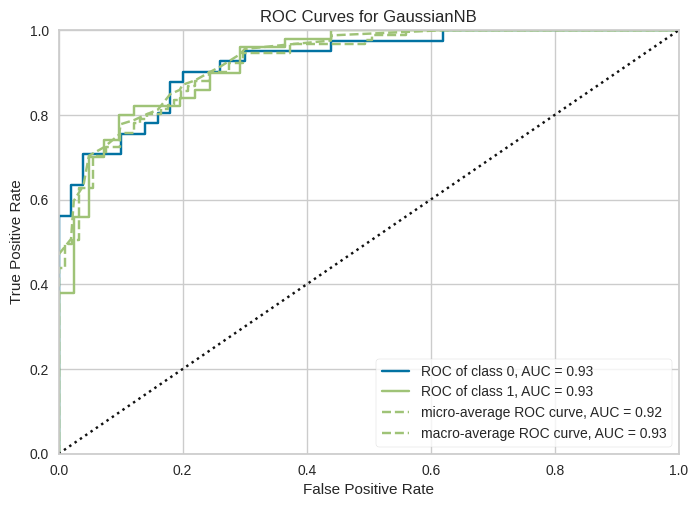

In [46]:
plot_model(best_model,plot='auc')

In [47]:
#interpret_model(best_model)

The above line of code throws error<br/>
**This makes sense because we cannot trigger an interpret funciton on a Gaussian NB. So lets try this on the first-best tree based classifier i.e Extra Trees Classifier.**

In [48]:
#et - Extra Trees Classifier
et_model=create_model('et',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.7542,0.8333,0.7143,0.7692,0.4407,0.4485
1,0.7727,0.8708,0.8333,0.7692,0.8000,0.5378,0.5401
2,0.7619,0.8455,0.6364,0.8750,0.7368,0.5291,0.5516
3,0.7619,0.8318,0.8182,0.7500,0.7826,0.5205,0.5230
4,0.9524,0.9909,1.0000,0.9167,0.9565,0.9041,0.9083
5,0.8095,0.9636,0.8182,0.8182,0.8182,0.6182,0.6182
6,0.7619,0.9182,0.8182,0.7500,0.7826,0.5205,0.5230
7,0.8571,0.9352,0.8333,0.9091,0.8696,0.7123,0.7156
8,0.7143,0.8704,0.7500,0.7500,0.7500,0.4167,0.4167


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

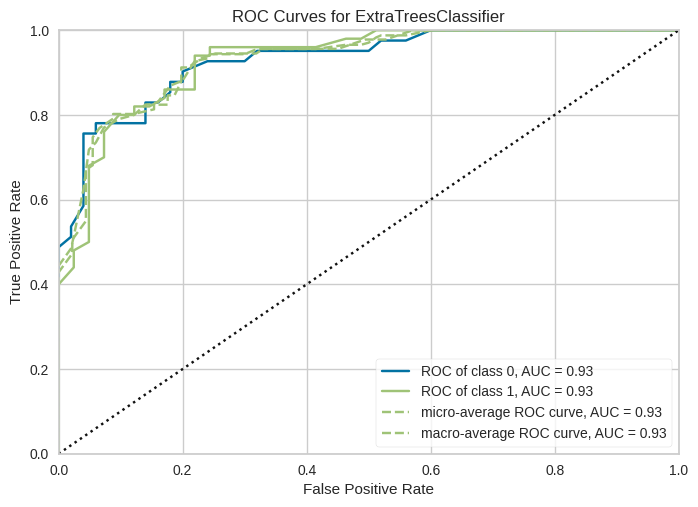

In [49]:
plot_model(et_model,plot='auc')

**SHAP analysis on the models from step 3**

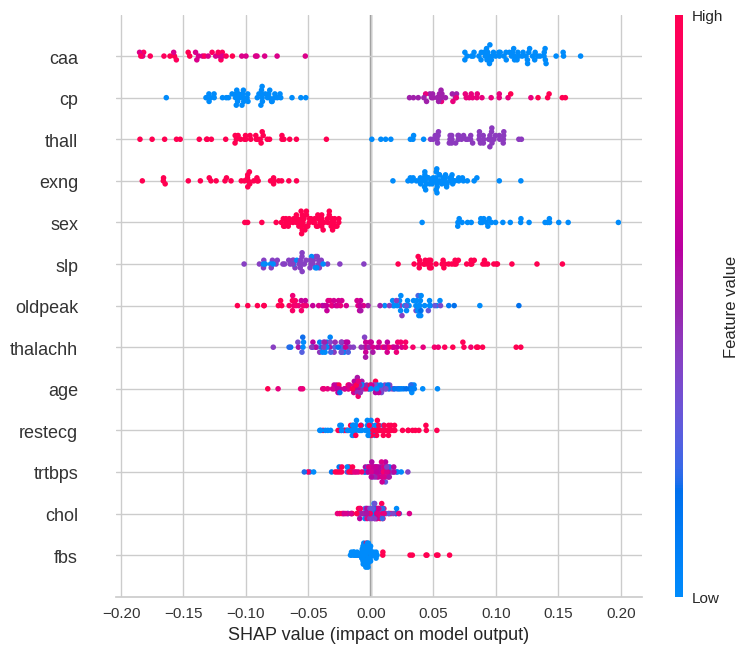

In [50]:
interpret_model(et_model)

**Intepreting the SHAP values:** <br/> 
the above plot says cp, slp, thalachh are the most important features, Since the above plot indicates cp,slp and thalachh having positive values to the value of output as 1

The partial dependence plots from the previous assignment shows that caa, cp, thalachh are the important features of the dataset

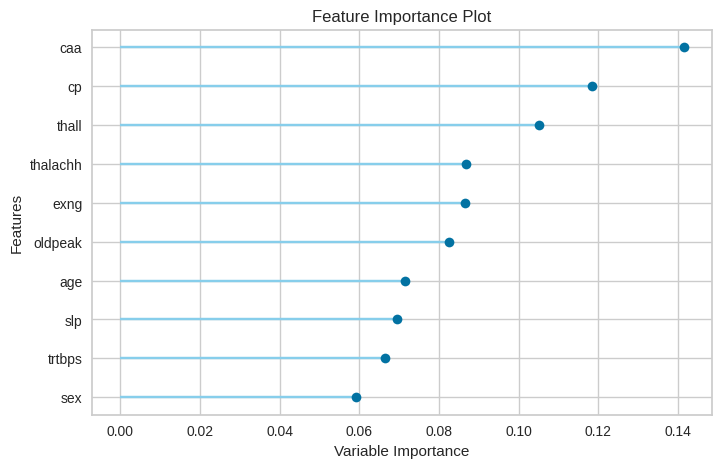

In [51]:
plot_model(et_model,plot='feature')

**Most important features for this neural network:**<br/>

caa: number of major vessels (0-3)<br/>
cp: Chest Pain type 

With this intuition, it's much easier to understand the <a href="https://christophm.github.io/interpretable-ml-book/shapley.html#the-shapley-value-in-detail"> math details of Shapely Values. </a>

LICENSE
MIT License


Copyright (c) 2022 Devika Boddu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**References**

https://pycaret.org/<br/>
Dataset- https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset<br/>
Partial Dependence plot: https://github.com/devika-boddu/DataScience-Engineering-Methods/blob/main/Assignment_2.ipynb
